### Домашнее задание

**1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ).
Сделайте вывод.**

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [41]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [42]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [43]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [44]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [45]:
print(np.mean(X_st[:, 1]))
print(np.std(X_st[:, 1]))

4.4408920985006264e-17
1.0


In [46]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [47]:
np.logspace(-3, 2, 50)

array([1.00000000e-03, 1.26485522e-03, 1.59985872e-03, 2.02358965e-03,
       2.55954792e-03, 3.23745754e-03, 4.09491506e-03, 5.17947468e-03,
       6.55128557e-03, 8.28642773e-03, 1.04811313e-02, 1.32571137e-02,
       1.67683294e-02, 2.12095089e-02, 2.68269580e-02, 3.39322177e-02,
       4.29193426e-02, 5.42867544e-02, 6.86648845e-02, 8.68511374e-02,
       1.09854114e-01, 1.38949549e-01, 1.75751062e-01, 2.22299648e-01,
       2.81176870e-01, 3.55648031e-01, 4.49843267e-01, 5.68986603e-01,
       7.19685673e-01, 9.10298178e-01, 1.15139540e+00, 1.45634848e+00,
       1.84206997e+00, 2.32995181e+00, 2.94705170e+00, 3.72759372e+00,
       4.71486636e+00, 5.96362332e+00, 7.54312006e+00, 9.54095476e+00,
       1.20679264e+01, 1.52641797e+01, 1.93069773e+01, 2.44205309e+01,
       3.08884360e+01, 3.90693994e+01, 4.94171336e+01, 6.25055193e+01,
       7.90604321e+01, 1.00000000e+02])

In [48]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [49]:
gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-1, reg=1e-4)

Iter: 0, weights: [10.13656229  2.28378821  0.24807073  2.8091473 ], error 3571.774494425961
Iter: 500, weights: [56.49717514  6.30232787 -0.35429095  6.56982555], error 24.904627710921524
Iter: 1000, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.90462764669092
Iter: 1500, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.90462764668884
Iter: 2000, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688823
Iter: 2500, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688823
Iter: 3000, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688823
Iter: 3500, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688823
Iter: 4000, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688823
Iter: 4500, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688823
Final MSE: 24.904627646688823


array([56.49717514,  6.30234588, -0.35437787,  6.5698973 ])

Text(0.5, 0, 'lambda')

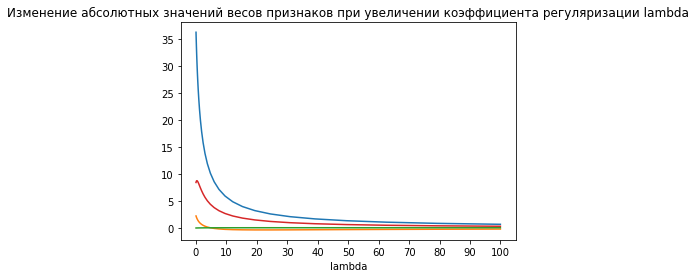

In [50]:
from sklearn.linear_model import Ridge

n = 50

coeffs = np.zeros((n, X.shape[1]))
alpha_list = np.logspace(-3, 2, n)

for i, val in enumerate(alpha_list):
    ridge = Ridge(alpha=val, fit_intercept=False)
    ridge.fit(X, y)
    
    coeffs[i, :] = ridge.coef_.flatten()

for i in range(X.shape[1]):
    plt.plot(alpha_list, coeffs[:, i])

plt.title('Изменение абсолютных значений весов признаков при увеличении коэффициента регуляризации lambda')
plt.xticks(np.arange(0, 101, 10))
plt.xlabel('lambda')

*Вывод: при увеличении коэффициента lambda увеличивается "штраф" за применение моделью больших весов для признаков. 
Абсолютные значения весов начинают снижаться, при этом модель старается сохранить минимальное значение MSE.
Если у нас имеется несколько признаков (больше одного), то одновременно происходит изменение весов всех признаков.*

**2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.**

In [51]:
def msin(W):
    if z > 0:
        res = 1
        return res
    elif z < 0:
        res = -1
        return res
    elif z == 0:
        res = 0
        return res

In [52]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
       
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
#       ИЗМЕНЕНИЯ
        dReg = reg * np.sign(W) # градиент регуляризации L1
#       ИЗМЕНЕНИЯ
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [53]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-1, reg=1e-6)

Iter: 0, weights: [10.91331591  3.47470538  2.17454727  1.19732653], error 3390.501407004887
Iter: 500, weights: [56.4999995   6.30306136 -0.35623752  6.5713521 ], error 24.90461888109244
Iter: 1000, weights: [56.4999995   6.30309147 -0.35638289  6.57147208], error 24.90461887691481
Iter: 1500, weights: [56.4999995   6.30309147 -0.3563829   6.57147208], error 24.904618876914796
Iter: 2000, weights: [56.4999995   6.30309147 -0.3563829   6.57147208], error 24.904618876914785
Iter: 2500, weights: [56.4999995   6.30309147 -0.3563829   6.57147208], error 24.904618876914785
Iter: 3000, weights: [56.4999995   6.30309147 -0.3563829   6.57147208], error 24.904618876914785
Iter: 3500, weights: [56.4999995   6.30309147 -0.3563829   6.57147208], error 24.904618876914785
Iter: 4000, weights: [56.4999995   6.30309147 -0.3563829   6.57147208], error 24.904618876914785
Iter: 4500, weights: [56.4999995   6.30309147 -0.3563829   6.57147208], error 24.904618876914785
Final MSE: 24.904618876914785


array([56.4999995 ,  6.30309147, -0.3563829 ,  6.57147208])